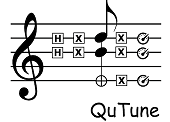

Supplementary material for book chapter: 

**_Quantum Computer Music: Foundations and Initial Experiments_**, by Eduardo R. Miranda and Suchitra T. Basak

(a) This demonstration is implemented in IBM Q's Qiskit. (https://qiskit.org/)

(b) To listen to the music you need run this Notebook alongside "MusicPatch.maxpat". Open the patch provided and make sure it plays musical notes on your computer. This patch sends out MIDI notes to your machine's default MIDI device, via UDP.

(c) Max is available from https://cycling74.com/

### Example: 1-D quantum walk

In [1]:
# import libraries

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

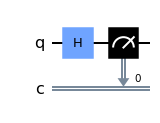

In [2]:
# define the circuit

def build_binary_die(draw_ckt):
    num_qubits = 1
    num_cbits = 1
    one_d_walk = QuantumCircuit(num_qubits, num_cbits)
    one_d_walk.h(0)
    one_d_walk.measure(0,0)

    if draw_ckt:
        display(one_d_walk.draw('mpl'))
    return(one_d_walk)


one_d_walk = build_binary_die(draw_ckt = True)

In [3]:
# function to run the circuit

def run_circuit(qc, view_histogram):
    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc, backend=backend, shots=100).result()
    answer = results.get_counts()
    
    if view_histogram:
        display(plot_histogram(answer))
        
    return(answer)


answer = run_circuit(one_d_walk, False)
print(answer)

{'0': 53, '1': 47}


In [4]:
# fucntion to calculate the next note

def calc_next_note(answer, initial_note = 1):
    dict_keys = list(answer.keys())

    dict_vals = []
    for i in dict_keys:
        dict_vals.append(answer[i])

    next_state = dict_keys[dict_vals.index(max(dict_vals))]
    next_state = int(next_state,2)
    
    if next_state == 0:
        next_note = initial_note - 1
    else:
        next_note = initial_note + 1

    return(next_note)

calc_next_note(answer, initial_note = 1)

0

#### Generating a stream of MIDI notes

In [5]:
initial_note = 60
how_many_notes = 16

pitches = []
initial_pitch = 0
for i in range(how_many_notes):
    one_d_walk = build_binary_die(draw_ckt = False)
    answer = run_circuit(one_d_walk, False)
    initial_note = calc_next_note(answer, initial_note = initial_note)
    
    pitches.append(initial_pitch + initial_note)
    
print(pitches)

[59, 58, 57, 58, 57, 58, 57, 58, 59, 60, 59, 58, 59, 60, 61, 60]


#### Send notes to Max MusicPatch

In [6]:
import time

# OSC to send data to max
from pythonosc.udp_client import SimpleUDPClient

In [7]:
client = SimpleUDPClient("127.0.0.1", 5005)

for i in pitches:
    send_pitch = i
    client.send_message("pitch", send_pitch)
    print(send_pitch)
    time.sleep(0.5)
        
print('data sent!')

59
58
57
58
57
58
57
58
59
60
59
58
59
60
61
60
data sent!
